# **GSK의 데이터 분석 실습: 1편_캐글 타이타닉 생존자 예측**

## **1단계: 라이브러리 가지고 오기 + CSV 파일 읽어오기**

In [1]:
import pandas as pd
import numpy as np

In [13]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [14]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [16]:
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv") 

## **2단계: 랜덤 시드 설정**

난수를 생성하는 이유는 데이터 분할, 샘플링 등에서 무작위성을 도입해 모델의 일반화 성능을 높이기 위함입니다. 
그중에서도 random.seed()를 사용하는 이유는 실험의 재현성을 보장하여 동일한 난수 시퀀스를 생성하고, 코드 실행 시 일관된 결과를 얻기 위해서입니다.

In [9]:
import random
np.random.seed(1234)
random.seed(1234)

## **3단계: Exploratory Data Analysis (EDA)**

### 데이터의 개요를 시각화하여 분석

### **데이터의 행과 열 확인하기**

In [21]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


### **데이터 내용 살펴보기 (head)**

In [22]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [19]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **Data Description**

Survived(생존 여부): 0 = 사망, 1 = 생존

Pclass(티켓 등급): 1= 일등석, 2= 이등석, 3= 3등석

Sex(성별)

Age(연령)

Sibsp(승선 중인 형제나 배우자의 수)

Parch (승선 중인 부모나 자녀의 수)

Ticket (티켓 번호)

Fare (티켓 요금)

Cabin (방 번호)

Embarked (승선한 항구의 이름): C= Cherboug, Q= Qweenstown, S=Southampton

### **데이터 속성 파악하기**

문자열 데이터(object 형): Name, Sex, Cabin, Embarked
수치 데이터(int, float 형)

<br>

#### **수치 데이터의 유형**

수치 데이터는 질적 변수와 양적 변수로 구분된다.

##### **질적 변수**

**질적 변수**는 수치 사이의 간격이 의미가 없는 경우에 해당한다. 질적 변수는 명목 척도와 순서 척도로 다시 구분된다.

**명목 척도**는 방 번호나 티켓 번호와 같이 분류만을 목적으로 하는 것이다.

**순서 척도**는 티켓 등급(1,2,3 등급)과 같이 순서에 의미를 부여하는 것을 목적으로 한다. 

<br>

##### **양적 변수**

**양적 변수**는 간격에 의미가 있는 수치이다. 양적 변수는 간격 척도와 비례 척도로 구분된다.

**간격 척도**는 온도와 같이 같은 간격의 눈금으로 측정하는 것이다.

**비례 척도**는 티켓 요금(1등급 석이 3등급 석보다 3배 비싸다)와 같이 데이터의 비율에 의미가 있는 것이다.



In [23]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### **데이터의 통계량 확인하기** (describe 함수)

In [24]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### **카테고리 변수 확인하기**

데이터 프레임에서 특정 열을 뽑아낸 데이터를 시리즈(serises)라 한다.

value_counts라는 함수를 통해 지정된 열에 포함된 값들과 중복 횟수를 파악할 수 있다.

In [27]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [28]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [29]:
train_data["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

### **결측치 확인하기**

In [31]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 확인 결과 학습 데이터와 테스트 데이터 모두 Age 및 Cabin 속성에 결측치가 많음을 알 수 있다. 

## **데이터의 시각화**

### matplotlib과 seaborn을 사용해서 데이터를 시각화 한다.

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
plt.style.use("ggplot")

### **목적 변수 (Survived) 관련 데이터의 시각화**

#### 데이터 프레임에서 임의의 열 추출하기

In [38]:
train_data[["Embarked","Survived","PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


#### 시각화 할 데이터에서 결측치 제외하기 (dropna 함수)

In [39]:
train_data[["Embarked","Survived","PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


#### Embarked와 Survived로만 집계하기

In [40]:
train_data[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [41]:
Embarked_df=train_data[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count().unstack() 
# unstack 함수는 데이터를 수평으로 변환할 때 사용하는 것이다.

In [42]:
Embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

#### 누적 막대 그래프로 시각화하기

<Axes: xlabel='Embarked'>

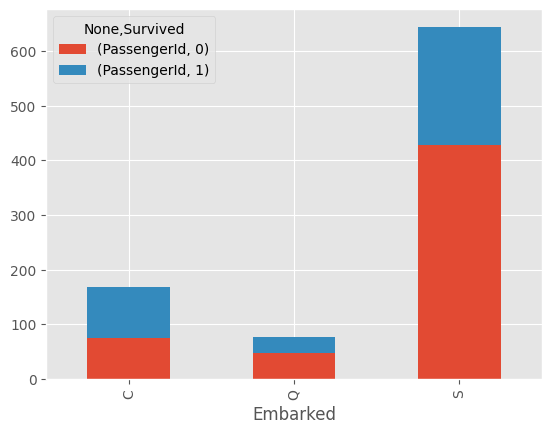

In [43]:
Embarked_df.plot.bar(stacked=True)

#### Survived Rate를 통해 이해하기

In [55]:
Embarked_df["Survived Rate"] = Embarked_df.iloc[:,1]/(Embarked_df.iloc[:,0]+Embarked_df.iloc[:,1])
# Embarked_df.iloc[:, 0]는 Embarked_df 데이터프레임의 첫 번째 열에 해당하는 모든 행을 선택

In [56]:
Embarked_df

PassengerId      Survived Rate
Survived           0    1              
Embarked                               
C                 75   93      0.553571
Q                 47   30      0.389610
S                427  217      0.336957

#### 성별과 티켓등급 시각화하기

생존율 분석을 통해 살펴보면, 여성 생존자가 남성 생존자보다 많다는 것을 알 수 있고, 1등석 승객 생존자가 3등석 승객 생존자보다 많음을 알 수있다.

<Axes: xlabel='Sex'>

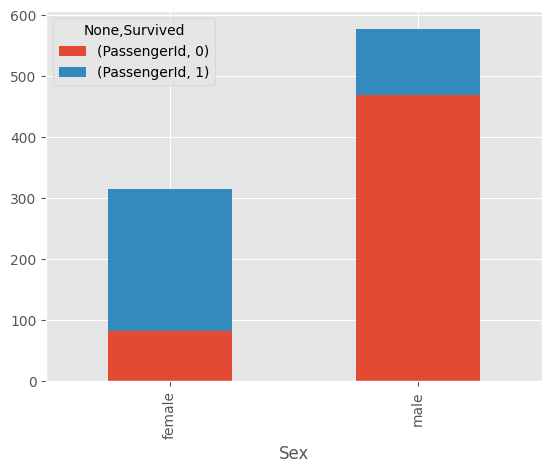

In [50]:
Sex_df=train_data[["Sex","Survived","PassengerId"]].dropna().groupby(["Sex","Survived"]).count().unstack()
Sex_df.plot.bar(stacked=True)

In [59]:
Sex_df["Survived Rate"] = Sex_df.iloc[:,1]/(Sex_df.iloc[:,0]+Sex_df.iloc[:,1])
Sex_df

PassengerId      Survived Rate
Survived           0    1              
Sex                                    
female            81  233      0.742038
male             468  109      0.188908

<Axes: xlabel='Pclass'>

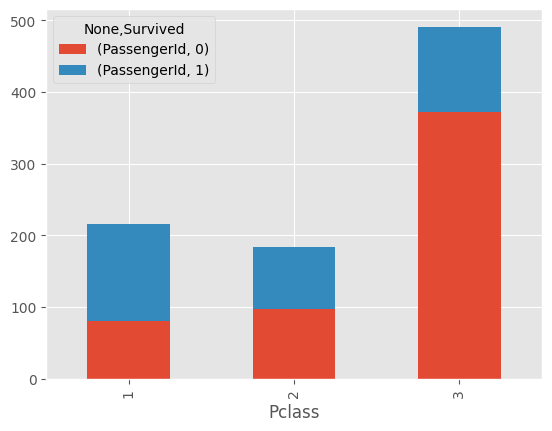

In [57]:
ticket_df=train_data[["Pclass","Survived","PassengerId"]].dropna().groupby(["Pclass","Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

In [60]:
ticket_df["Survived Rate"] = ticket_df.iloc[:,1]/(ticket_df.iloc[:,0]+ticket_df.iloc[:,1])
ticket_df

PassengerId      Survived Rate
Survived           0    1              
Pclass                                 
1                 80  136      0.629630
2                 97   87      0.472826
3                372  119      0.242363